In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
df = pd.read_csv('1.csv')

In [235]:
df=df.drop(' 4 for malignant)',axis=1)

In [236]:
df =df.replace(to_replace='?',value=np.nan)
df = df.fillna(0)

In [237]:
df['Bare Nuclei']=pd.to_numeric(df['Bare Nuclei'])
df.rename(columns={'Class: (2 for benign,  4 for malignant)': 'Class'}, inplace=True)

In [238]:
y=df.Class
X=df.drop('Class',axis=1)

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [241]:
impo=clf.feature_importances_

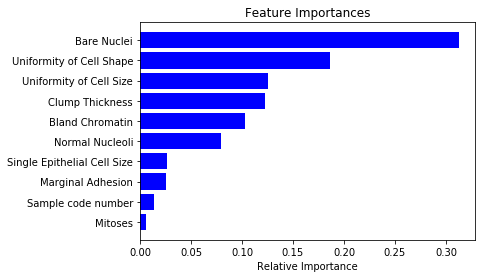

In [242]:
features = X.columns
importances = impo
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [201]:
X=X.drop(['Sample code number','Mitoses'],axis=1)

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [248]:
clf = RandomForestClassifier(max_depth=3,min_samples_leaf=3,
                             min_samples_split=19,n_estimators=17,
                             bootstrap=True,max_leaf_nodes=48,min_impurity_decrease=0.0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print('True Negatives')
print(tn)
print('False Positives')
print(fp)
print('True Positives')
print(tp)
print('False Negatives')
print(fn)

True Negatives
133
False Positives
5
True Positives
68
False Negatives
4
